In [1]:
from config import *
import processing
import models
import torch.optim as optim
import torch.nn as nn
import numpy as np
import math
import torch
import json



In [ ]:
processing.preprocess_midi_files('F:\\GitHub\\dataset\\midi_dataset', 'F:\\GitHub\\dataset\\np_dataset')

 [F:\GitHub\dataset\midi_dataset\2_Unlimited\Get_Ready_for_This.mid] [F:\GitHub\dataset\midi_dataset\2_Unlimited\Here_I_Go.mid] [F:\GitHub\dataset\midi_dataset\2_Unlimited\Let_the_Beat_Control_Your_Body.1.mid] [F:\GitHub\dataset\midi_dataset\2_Unlimited\Let_the_Beat_Control_Your_Body.2.mid] [F:\GitHub\dataset\midi_dataset\2_Unlimited\Let_the_Beat_Control_Your_Body.3.mid] [F:\GitHub\dataset\midi_dataset\2_Unlimited\Let_the_Beat_Control_Your_Body.mid] [F:\GitHub\dataset\midi_dataset\2_Unlimited\Maximum_Overdrive.1.mid] [F:\GitHub\dataset\midi_dataset\2_Unlimited\Maximum_Overdrive.mid] [F:\GitHub\dataset\midi_dataset\2_Unlimited\No_Limit.1.mid] [F:\GitHub\dataset\midi_dataset\2_Unlimited\No_Limit.2.mid] [F:\GitHub\dataset\midi_dataset\2_Unlimited\No_Limit.mid] [F:\GitHub\dataset\midi_dataset\2_Unlimited\No_Limits.mid] [F:\GitHub\dataset\midi_dataset\2_Unlimited\No_Limit_extended_.mid] [F:\GitHub\dataset\midi_dataset\2_Unlimited\No_One.1.mid] [F:\GitHub\dataset\midi_dataset\2_Unlimited\No_

C:\Users\Draco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pretty_midi\pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


 [F:\GitHub\dataset\midi_dataset\883\Come_mai_feat._Fiorello_.1.mid] [F:\GitHub\dataset\midi_dataset\883\Come_mai_feat._Fiorello_.2.mid] [F:\GitHub\dataset\midi_dataset\883\Come_mai_feat._Fiorello_.mid] [F:\GitHub\dataset\midi_dataset\883\Con_un_deca.1.mid] [F:\GitHub\dataset\midi_dataset\883\Con_un_deca.mid] [F:\GitHub\dataset\midi_dataset\883\Cumuni.mid] [F:\GitHub\dataset\midi_dataset\883\Dimmi_perche_remix_.mid] [F:\GitHub\dataset\midi_dataset\883\Gli_anni_96_.1.mid] [F:\GitHub\dataset\midi_dataset\883\Gli_anni_96_.mid] [F:\GitHub\dataset\midi_dataset\883\Grazie_mille.1.mid] [F:\GitHub\dataset\midi_dataset\883\Grazie_mille.mid] [F:\GitHub\dataset\midi_dataset\883\Hanno_ucciso_luomo_ragno.1.mid] [F:\GitHub\dataset\midi_dataset\883\Hanno_ucciso_luomo_ragno.2.mid] [F:\GitHub\dataset\midi_dataset\883\Hanno_ucciso_luomo_ragno.mid] [F:\GitHub\dataset\midi_dataset\883\Innamorare_tanto.mid] [F:\GitHub\dataset\midi_dataset\883\Io_ci_saro.1.mid] [F:\GitHub\dataset\midi_dataset\883\Io_ci_saro

In [2]:
train_dataloader, test_dataloader = processing.get_train_test_dataloaders('F:\\GitHub\\dataset\\np_dataset')


In [3]:
with open('F:\\GitHub\\dataset\\midi_dataset\\tokenizations.json', 'r') as f:
    tokenizations = json.load(f)
METADATA_VOCAB_SIZE = tokenizations['VOCAB_SIZE']
model = models.SimpleTransformer(VOCAB_SIZE, METADATA_VOCAB_SIZE, N_EMBD, N_HEAD, N_LAYER, FEEDFORWARD_DIM, BLOCK_SIZE, DROPOUT, DEVICE)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

# Training loop
num_epochs = EPOCHS
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    total_loss = 0

    for batch_idx, (src, trg, metadata) in enumerate(train_dataloader):
        # Forward pass
        output = model(src, metadata)
        # print(output.shape)
        # Reshape output and target for loss calculation
        output = output.reshape(-1, VOCAB_SIZE)  # Flatten the output to [batch_size * seq_len, vocab_size]
        trg = trg.view(-1)  # Flatten the target to [batch_size * seq_len]

        # Compute loss
        loss = criterion(output, trg)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()

        if (batch_idx + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{batch_idx+1}/{len(train_dataloader)}], Loss: {loss.item():.4f}')

    avg_loss = total_loss / len(train_dataloader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Average Loss: {avg_loss:.4f}')

    # Validation loop (optional)
    model.eval()  # Set the model to evaluation mode
    val_loss = 0
    with torch.no_grad():
        for src, trg, metadata in test_dataloader:
            src, trg = src.to(DEVICE), trg.to(DEVICE)
            output = model(src, metadata)
            output = output.reshape(-1, VOCAB_SIZE)
            trg = trg.view(-1)
            val_loss += criterion(output, trg).item()
    
    avg_val_loss = val_loss / len(test_dataloader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Validation Loss: {avg_val_loss:.4f}')

print("Training complete!")

TypeError: SequenceDataset.data_augementation() takes 1 positional argument but 2 were given

In [4]:
for batch_idx, (src, trg, metadata) in enumerate(train_dataloader):
        # Forward pass
        output = model(src, metadata)
        print(output.argmax(dim=2))

tensor([[258, 258, 258,  ..., 258, 258, 258],
        [258, 258, 258,  ..., 258, 258, 258],
        [258, 258, 258,  ..., 258, 258, 258],
        ...,
        [258, 258, 258,  ..., 258, 258, 258],
        [258, 258, 258,  ..., 258, 258, 258],
        [258, 258, 258,  ..., 258, 258, 258]], device='cuda:0')
tensor([[258, 258, 258,  ..., 258, 258, 258],
        [258, 258, 258,  ..., 258, 258, 258],
        [258, 258, 258,  ..., 258, 258, 258],
        ...,
        [258, 258, 258,  ..., 258, 258, 258],
        [258, 258, 258,  ..., 258, 258, 258],
        [258, 258, 258,  ..., 258, 258, 258]], device='cuda:0')
tensor([[258, 258, 258,  ..., 258, 258, 258],
        [258, 258, 258,  ..., 258, 258, 258],
        [258, 258, 258,  ..., 258, 258, 258],
        ...,
        [258, 258, 258,  ..., 258, 258, 258],
        [258, 258, 258,  ..., 258, 258, 258],
        [258, 258, 258,  ..., 258, 258, 258]], device='cuda:0')
tensor([[258, 258, 258,  ..., 258, 258, 258],
        [258, 258, 258,  ..., 258

<BarContainer object of 985 artists>

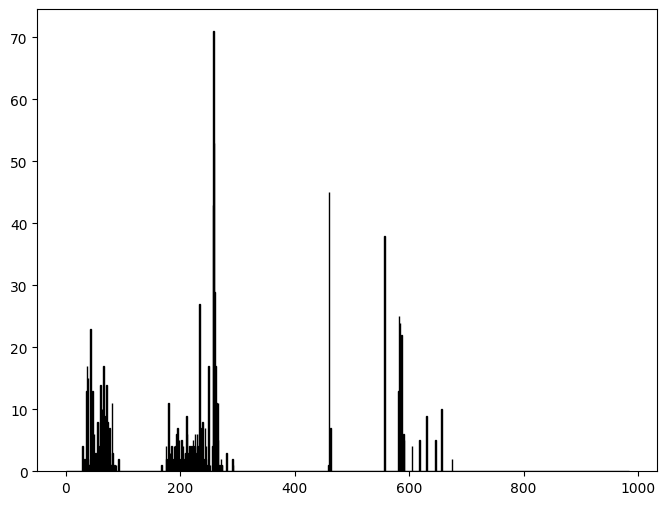

In [5]:
flattened_tensor = src.flatten()
bins = VOCAB_SIZE
hist = torch.histc(flattened_tensor.int(), bins=bins, min=0, max=VOCAB_SIZE)
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.bar(range(bins), hist.cpu().int().numpy(), width=1, align='center', color='blue', edgecolor='black')


In [6]:
for batch_idx, (src, trg, metadata) in enumerate(train_dataloader):
    print(src.shape)

torch.Size([8, 256])
torch.Size([8, 256])
torch.Size([8, 256])
torch.Size([8, 256])
torch.Size([8, 256])
torch.Size([4, 256])


In [12]:
print(START_IDX)

{'PITCH_RES': 1, 'DYN_RES': 129, 'LENGTH_RES': 257, 'TIME_RES': 457, 'CHANNEL_RES': 557, 'TEMPO_RES': 685}


In [7]:
src_vocab_size, metadata_vocab_size, d_model, num_heads, num_layers, d_ff, max_len, dropout, device = VOCAB_SIZE, METADATA_VOCAB_SIZE, N_EMBD, N_HEAD, N_LAYER, FEEDFORWARD_DIM, BLOCK_SIZE, DROPOUT, DEVICE
embedding = nn.Embedding(src_vocab_size, d_model).to(device)
metadata_embedding = nn.Embedding(metadata_vocab_size, d_model).to(device)  # Metadata embedding layer
positional_encoding = models.PositionalEncoding(d_model, max_len, device)
layers = nn.ModuleList([models.TransformerBlock(d_model, num_heads, d_ff, dropout).to(device) for _ in range(num_layers)])  # Adjust for concatenated embeddings
fc_out = nn.Linear(d_model, src_vocab_size).to(device)  # Adjust for concatenated embeddings
dropout = nn.Dropout(dropout).to(device)
max_len = max_len

In [22]:
src = src.to(device)
# start_idx = [self.get_idx(x) for x in src[:, 0]]
metadata = metadata.to(device)
# Embed the input sequence
src_emb = embedding(src)  # Shape: [batch_size, seq_len, d_model]
src_emb = positional_encoding(src_emb)  # Shape: [batch_size, seq_len, d_model]
metadata_emb = metadata_embedding(metadata)  # Shape: [batch_size, 6, d_model]

# x = torch.cat([metadata_emb, src_emb], dim=-2)  # Shape: [batch_size, seq_len + 6, d_model]
# x = self.dropout(src_emb)
x = src_emb

# Pass through transformer layers
for layer in layers:
    x = layer(x, None)

# Final output layer
out = fc_out(x)  # Shape: [batch_size, seq_len, src_vocab_size]

In [30]:
out.argmax(2).unsqueeze(1) 

tensor([[[545, 471, 702,  ..., 892, 485,  89]],

        [[636, 330, 718,  ..., 545,  19, 419]],

        [[139, 539, 666,  ..., 300, 942, 700]],

        [[297,  48, 601,  ..., 636,  23, 277]]], device='cuda:0')

In [49]:
output = model(src, metadata)
print(trg.shape)
print(src.shape)
print(output.argmax(dim=2))
idx = torch.tensor([[0, 1, 2, 3, 4, 5, 6, 7, 9, 8], [0, 1, 2, 3, 4, 5, 6, 7, 9, 8], [0, 1, 2, 3, 4, 5, 6, 7, 9, 11]])
idx.argmax(dim=1)

torch.Size([4, 256])
torch.Size([4, 256])
tensor([[258, 258, 258,  ..., 259, 258, 258],
        [258, 258, 258,  ..., 258, 258, 258],
        [258, 258, 258,  ..., 258, 258, 258],
        [258, 258, 258,  ..., 258, 258, 258]], device='cuda:0')


tensor([8, 8, 9])